<a href="https://colab.research.google.com/github/14Fabyzz/prediccion-tarifa-energia/blob/main/EnergyProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DatasetTarifaEnergia

In [ ]:
#paso 1: Importar libreria
#from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Paso 3: Leer el archivo CSV usando pandas
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/bootcamp/datosedepDf.csv")
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Año,Mes,Clase de Servicio,Todo Consumo
0,2014.0,Enero,Estrato1,360.03958
1,2014.0,Enero,Estrato2,360.03958
2,2014.0,Enero,Estrato3,360.03958
3,2014.0,Enero,Estrato4,360.03958
4,2014.0,Enero,Estrato5,432.04750
5,2014.0,Enero,Estrato6,432.04750
6,2014.0,Enero,Comercial / Industrial,432.04750
7,2014.0,Enero,Oficial / Especial,360.03958
8,2014.0,Enero,Provisional,432.04750
9,2014.0,Febrero,Estrato1,360.03958


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                1230 non-null   float64
 1   Mes                1231 non-null   object 
 2   Clase de Servicio  1231 non-null   object 
 3   Todo Consumo       1230 non-null   float64
dtypes: float64(2), object(2)
memory usage: 38.7+ KB


In [ ]:
df.describe()

,Año,Tarifa_kWh,Numero_Mes,numero_clase_servicio,Fecha
count,1230.000000,1230.000000,1230.000000,1230.000000,1230
mean,2019.209756,658.463594,6.370732,3.997561,2019-08-28 12:10:32.195121920
min,2014.000000,360.039580,1.000000,0.000000,2014-01-01 00:00:00
25%,2016.000000,498.135000,3.000000,2.000000,2016-11-01 00:00:00
50%,2019.000000,600.770000,6.000000,4.000000,2019-09-01 00:00:00
75%,2022.000000,759.041900,9.000000,6.000000,2022-07-01 00:00:00
max,2025.000000,1227.370200,12.000000,8.000000,2025-05-01 00:00:00
std,3.301735,211.800935,3.467499,2.579728,NaN


In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

#borrar los nulos
df = df.dropna()


Año                      0
Mes                      0
Clase de Servicio        0
Tarifa_kWh               0
Numero_Mes               0
numero_clase_servicio    0
Fecha                    0
dtype: int64


In [ ]:
# Renombrar columna Todo Consumo a Tarifa_kWh, legibilidad

df = df.rename(columns={'Todo Consumo': 'Tarifa_kWh'})

#año a entero
df['Año'] = df['Año'].astype(int)

# Crear columna de Número de Mes
mes_a_numero = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

df['Numero_Mes'] = df['Mes'].map(mes_a_numero)


In [ ]:
# 1. Limpieza inicial del texto
clase_clean = df['Clase de Servicio'].str.lower().str.strip()

# 2. Diccionario de mapeo
service_map = {
    'estrato1': 1,
    'estrato2': 2,
    'estrato3': 3,
    'estrato4': 4,
    'estrato5': 5,
    'estrato6': 6,
    'comercial / industrial': 7,
    'oficial / especial': 8,
    'provisional': 9
}

# 3. Aplicar el mapeo
df['numero_clase_servicio'] = clase_clean.map(service_map)
print(df.isnull().sum())

Año                      0
Mes                      0
Clase de Servicio        0
Tarifa_kWh               0
Numero_Mes               0
numero_clase_servicio    0
dtype: int64


In [ ]:
display(df)

,Año,Mes,Clase de Servicio,Tarifa_kWh,Numero_Mes,numero_clase_servicio
0,2014,Enero,Estrato1,360.03958,1,1
1,2014,Enero,Estrato2,360.03958,1,2
2,2014,Enero,Estrato3,360.03958,1,3
3,2014,Enero,Estrato4,360.03958,1,4
4,2014,Enero,Estrato5,432.04750,1,5
...,...,...,...,...,...,...
1226,2025,Mayo,Estrato5,1161.95000,5,5
1227,2025,Mayo,Estrato6,1161.95000,5,6
1228,2025,Mayo,Comercial / Industrial,1161.95000,5,7
1229,2025,Mayo,Oficial / Especial,968.29000,5,8


In [ ]:
# Creamos la columna 'Fecha' combinando 'Año' y 'Numero_Mes'
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Numero_Mes'].astype(str) + '-01')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Año                    1230 non-null   int64         
 1   Mes                    1230 non-null   object        
 2   Clase de Servicio      1230 non-null   object        
 3   Tarifa_kWh             1230 non-null   float64       
 4   Numero_Mes             1230 non-null   int64         
 5   numero_clase_servicio  1230 non-null   int64         
 6   Fecha                  1230 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 76.9+ KB


In [ ]:
# promedio de Tarifa_kWh por año
print(df.groupby('Año')['Tarifa_kWh'].mean())


Año
2014     414.387502
2015     436.824915
2016     534.373762
2017     533.991569
2018     555.713611
2019     582.384093
2020     634.177326
2021     666.664927
2022     764.528187
2023     894.731430
2024    1058.748836
2025    1073.990889
Name: Tarifa_kWh, dtype: float64


Distribución de Frecuencias

In [ ]:
# Clase de Servicio
df['Clase de Servicio'].value_counts()

,count
Clase de Servicio,
Estrato1,137
Estrato2,137
Estrato3,137
Estrato4,137
Estrato5,137
Estrato6,137
Comercial / Industrial,136
Oficial / Especial,136
Provisional,136


In [ ]:
# cantidad de registros por año
df['Año'].value_counts().sort_index()

,count
Año,
2014,108
2015,108
2016,108
2017,108
2018,108
2019,108
2020,108
2021,108
2022,108


Medidas de Tendencia Central

In [ ]:
#promedio de las tarifas de energía
df['Tarifa_kWh'].mean()

np.float64(658.4635940804878)

In [ ]:
#valor central de las tarifas
df['Tarifa_kWh'].median()

600.77

In [ ]:
#valor central de las tarifas
df['Tarifa_kWh'].median()

600.77

Medidas de Variabilidad

In [ ]:
# Varianza
varianza_tarifa_kwh = df['Tarifa_kWh'].var()
print(f"Varianza: {varianza_tarifa_kwh:.4f}")

# Desviación Estándar
desviacion_estandar_tarifa_kwh = df['Tarifa_kWh'].std()
print(f"Desviación Estándar: {desviacion_estandar_tarifa_kwh:.4f}")

# Rango
rango_tarifa_kwh = df['Tarifa_kWh'].max() - df['Tarifa_kWh'].min()
print(f"Rango: {rango_tarifa_kwh:.4f}")

# Cuartil 1 (Q1)
q1_tarifa_kwh = df['Tarifa_kWh'].quantile(0.25)
print(f"Cuartil 1 (Q1): {q1_tarifa_kwh:.4f}")

# Cuartil 3 (Q3)
q3_tarifa_kwh = df['Tarifa_kWh'].quantile(0.75)
print(f"Cuartil 3 (Q3): {q3_tarifa_kwh:.4f}")

# Rango Intercuartílico (IQR)
iqr_tarifa_kwh = q3_tarifa_kwh - q1_tarifa_kwh
print(f"Rango Intercuartílico (IQR): {iqr_tarifa_kwh:.4f}")

print("\nDesviación estándar de 'Tarifa_kWh' por Clase de Servicio:")
print(df.groupby('Clase de Servicio')['Tarifa_kWh'].std())

Varianza: 44859.6362
Desviación Estándar: 211.8009
Rango: 867.3306
Cuartil 1 (Q1): 498.1350
Cuartil 3 (Q3): 759.0419
Rango Intercuartílico (IQR): 260.9069

Desviación estándar de 'Tarifa_kWh' por Clase de Servicio:
Clase de Servicio
Comercial / Industrial    223.661023
Estrato1                  186.451335
Estrato2                  186.451335
Estrato3                  186.451335
Estrato4                  186.451335
Estrato5                  223.741717
Estrato6                  223.741717
Oficial / Especial        186.384090
Provisional               223.661018
Name: Tarifa_kWh, dtype: float64


Visualizaciones 📊

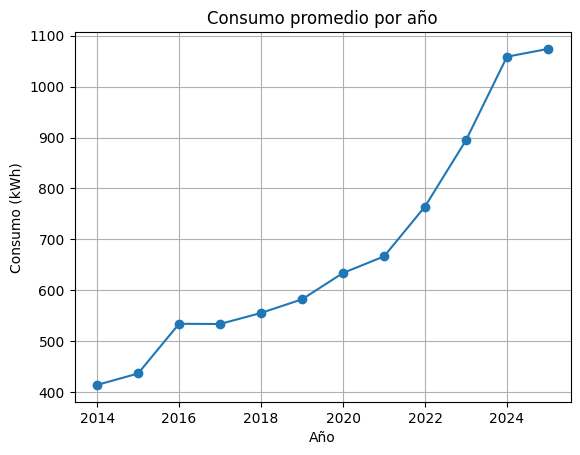

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un gráfico de líneas para cada año
# Agrupar por año y sacar el promedio del consumo
df.groupby('Año')['Tarifa_kWh'].mean().plot(marker='o', title='Consumo promedio por año')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.show()


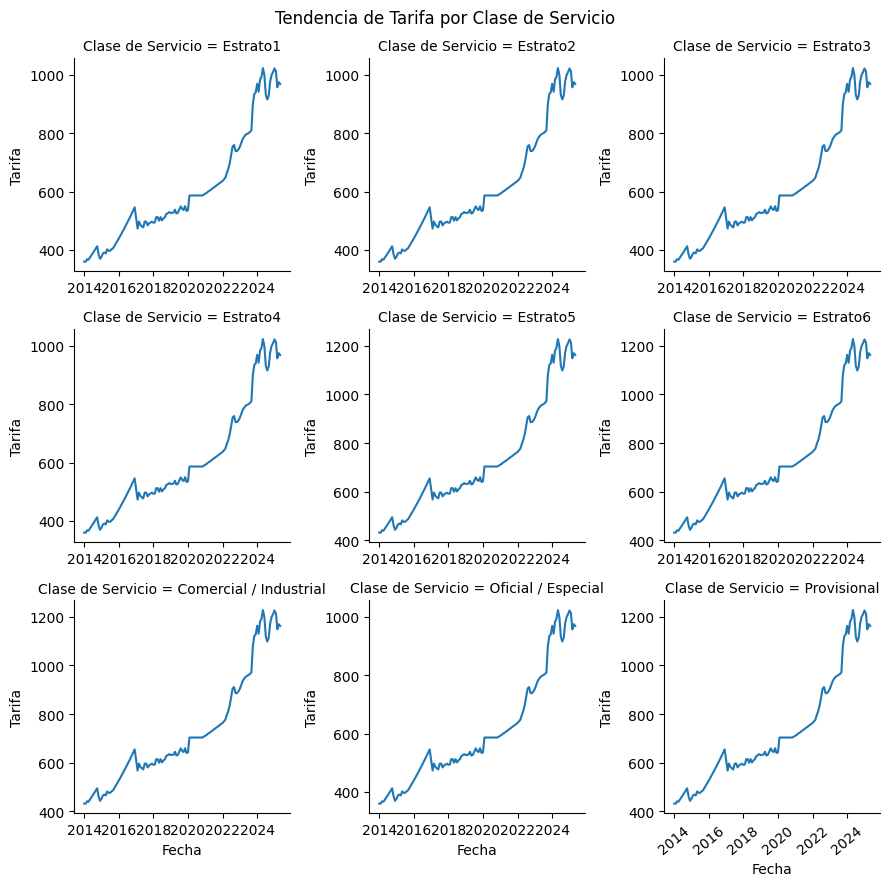

In [ ]:
# Grafica de Tarifa por clase de servicio

# Ordenamos el DataFrame por la fecha
df_sorted = df.sort_values('Fecha')

# Creamos el FacetGrid
# FacetGrid  crear múltiples gráficos (subplots) organizados en una cuadrícula

g = sns.FacetGrid(df_sorted, col='Clase de Servicio', col_wrap=3, height=3, sharey=False)

# Asignamos el gráfico de líneas al FacetGrid
g.map_dataframe(sns.lineplot, x='Fecha', y='Tarifa_kWh')

# Personalizamos los ejes
for ax in g.axes.ravel():
    ax.tick_params(labelbottom=True)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Tarifa')
# Adjust layout and add a title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Tendencia de Tarifa por Clase de Servicio')

# Rotamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=40)

# Aseguramos un diseño ajustado
plt.tight_layout()

# Show
plt.show()

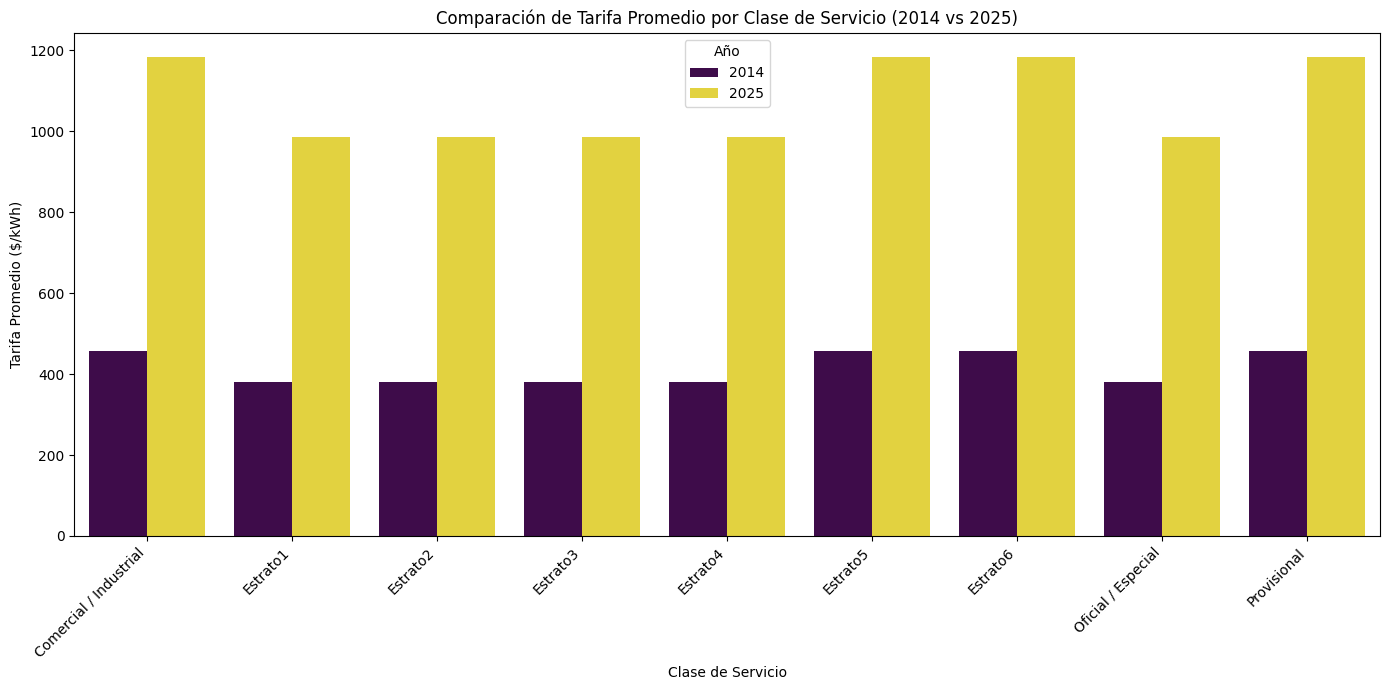

In [ ]:
# grafica  tarifa promedio por clase de servicio comparando el primer año y el último año
# Obtener el primer y último año del dataset
primer_año = df['Año'].min()
ultimo_año = df['Año'].max()

# Filtrar los datos para el primer y último año
df_comparacion_años = df[(df['Año'] == primer_año) | (df['Año'] == ultimo_año)]

# Calcular la tarifa promedio por clase de servicio y año
df_comparacion_promedio = df_comparacion_años.groupby(['Año', 'Clase de Servicio'])['Tarifa_kWh'].mean().reset_index()

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(14, 7))
sns.barplot(data=df_comparacion_promedio, x='Clase de Servicio', y='Tarifa_kWh', hue='Año', palette='viridis')

plt.title(f'Comparación de Tarifa Promedio por Clase de Servicio ({primer_año} vs {ultimo_año})')
plt.xlabel('Clase de Servicio')
plt.ylabel('Tarifa Promedio ($/kWh)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

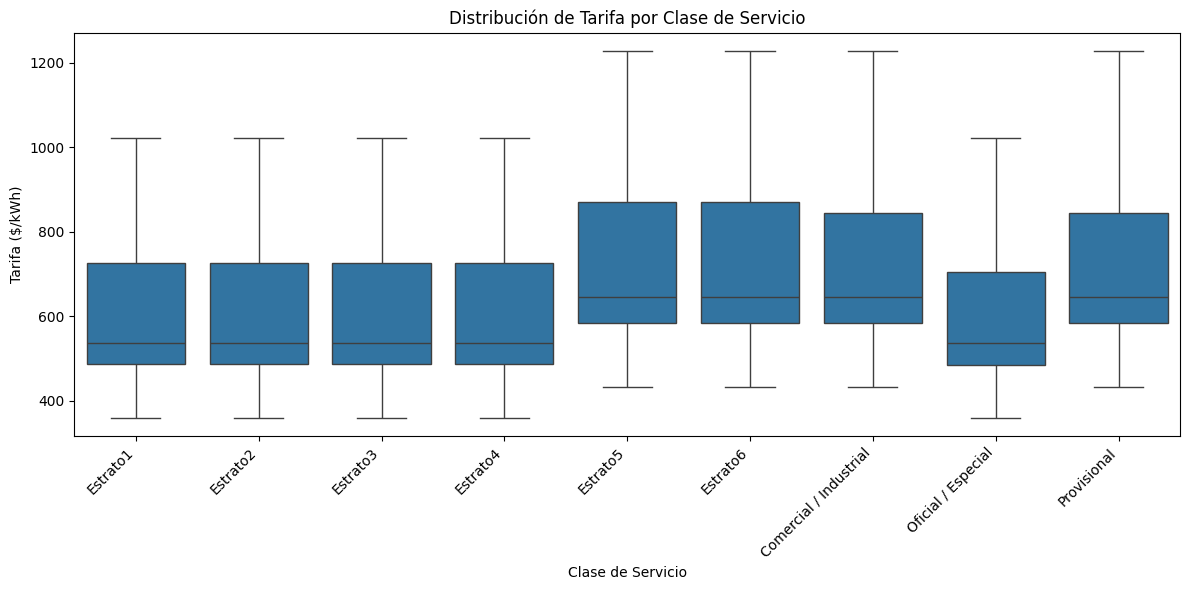

In [ ]:
# Grafica  Comparación de Tarifas por Estrato
# Boxplot de Tarifa_kWh por Clase de Servicio
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Clase de Servicio', y='Tarifa_kWh')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
plt.title('Distribución de Tarifa por Clase de Servicio')
plt.xlabel('Clase de Servicio')
plt.ylabel('Tarifa ($/kWh)')
plt.tight_layout() # Ajustar layout para evitar solapamiento
plt.show()

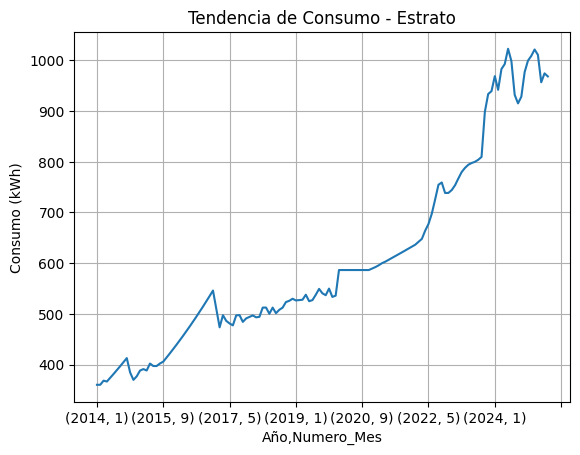

In [ ]:
#Tendencia de consumo para un servicio específico
df[df['Clase de Servicio'] == 'Estrato1'].groupby(['Año', 'Numero_Mes'])['Tarifa_kWh'].mean().plot(title='Tendencia de Consumo - Estrato')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.show()

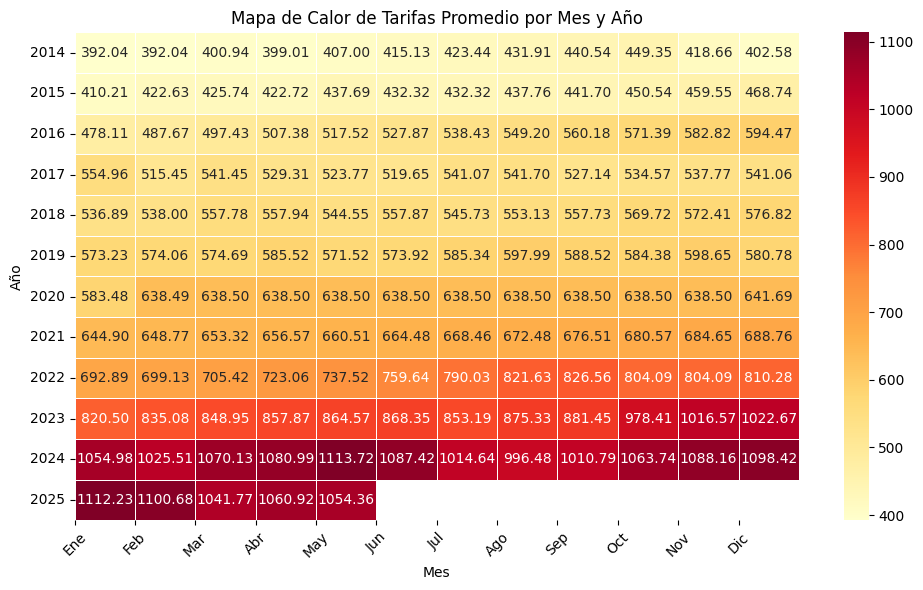

In [ ]:
# Mapa de Calor de la Tarifa Promedio Mensual de Energía (2014-2025)

# Crear tabla dinámica (pivot table)
pivot = df.pivot_table(
    values='Tarifa_kWh',
    index='Año',
    columns='Numero_Mes',
    aggfunc='mean'
)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)

# Etiquetas y título
plt.title('Mapa de Calor de Tarifas Promedio por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(ticks=range(12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


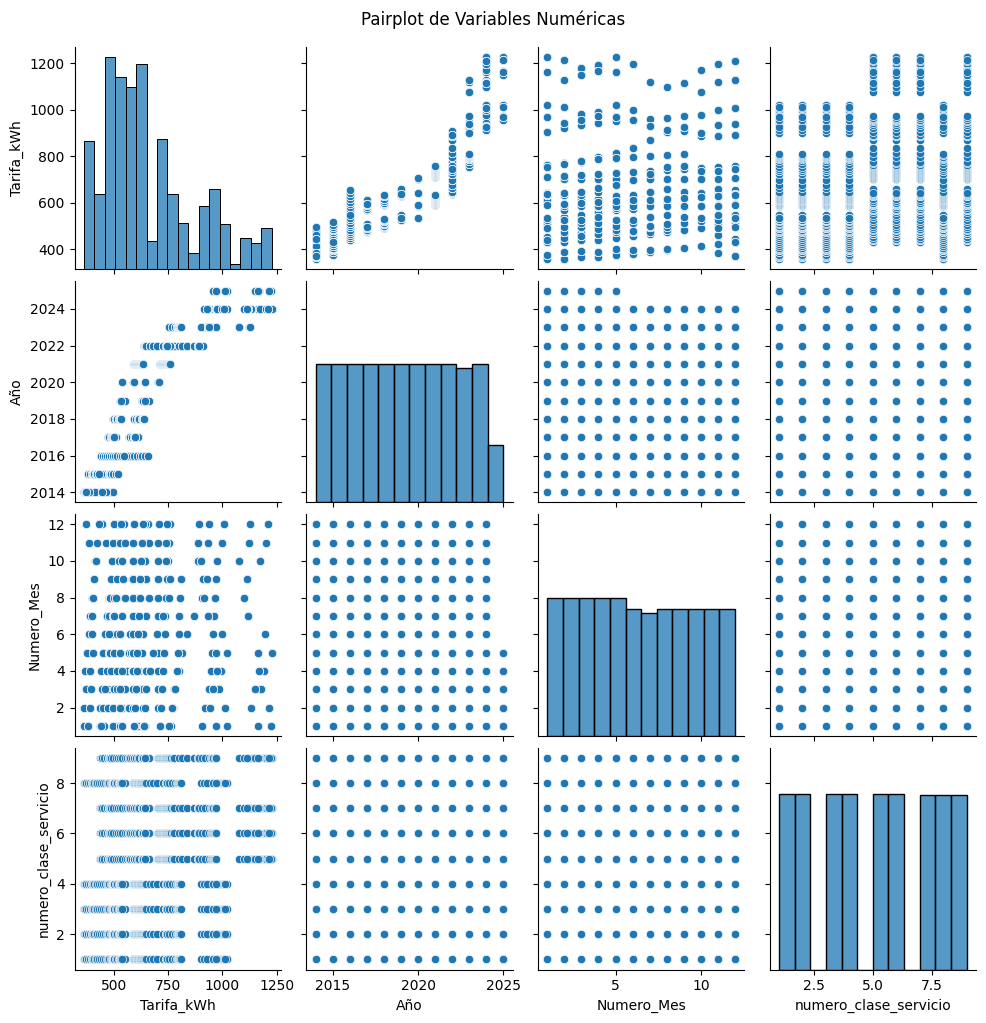

In [ ]:
# Grafica Pairplot para visualizar relaciones entre variables numéricas
# Seleccionamos las columnas numéricas relevantes para el pairplot
numeric_cols = ['Tarifa_kWh', 'Año', 'Numero_Mes', 'numero_clase_servicio']

# Creamos el pairplot
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot de Variables Numéricas', y=1.02) # Añadir un título a la figura
plt.show()

# Conclusiones Clave de las Relaciones:

# Tarifa_kWh está fuertemente influenciada por el Año y, de manera más prominente, por la Clase

# de Servicio (representada por numero_clase_servicio).

# Existe una tendencia al alza en las tarifas a lo largo del tiempo (Año).

# La Clase de Servicio es un factor clave en la determinación del nivel de la tarifa, con diferentes clases teniendo rangos de tarifas distintos.

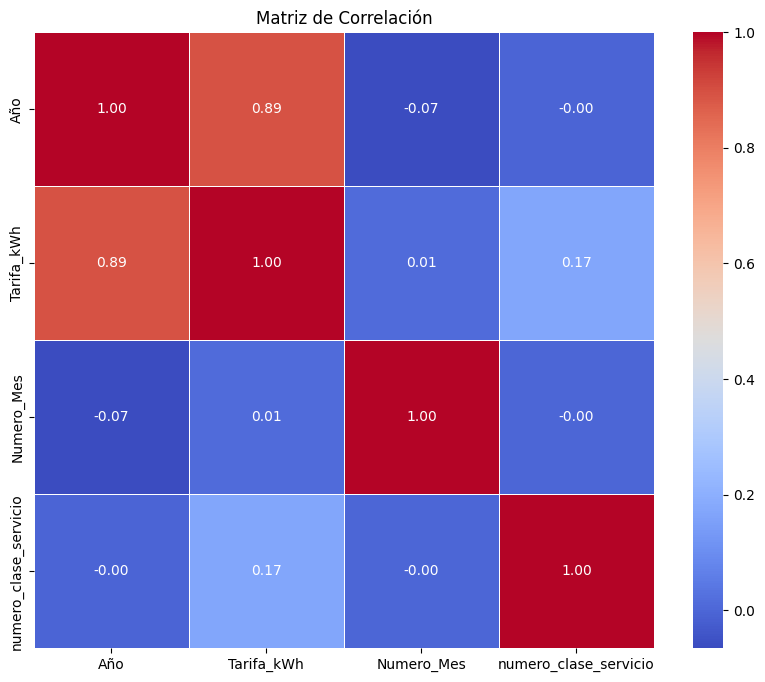

In [ ]:
# Gráfico de matriz de correlación (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

#Tarifa_kWh vs. Año (0.89):
#Existe una correlación positiva muy fuerte entre Tarifa_kWh y Año. Esto significa que, a medida que el año avanza, la tarifa de energía (Tarifa_kWh)
# tiende a aumentar significativamente.

REGRESIÓN LINEAL 📈

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variables predictoras (X) y objetivo (y)
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir tarifas
y_pred = modelo.predict(X_test)

# Evaluar el modelo - Coeficiente de determinacion
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² (coef. de determinación): {r2:.4f}")
print(f"RMSE (error cuadrático medio): {rmse:.2f} $/kWh")

# Mostrar coeficientes
coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
print("\nCoeficientes del modelo:")
print(coef)

R² (coef. de determinación): 0.8154
RMSE (error cuadrático medio): 90.65 $/kWh

Coeficientes del modelo:
                Variable  Coeficiente
0                    Año    57.799950
1             Numero_Mes     3.689908
2  numero_clase_servicio    14.349998


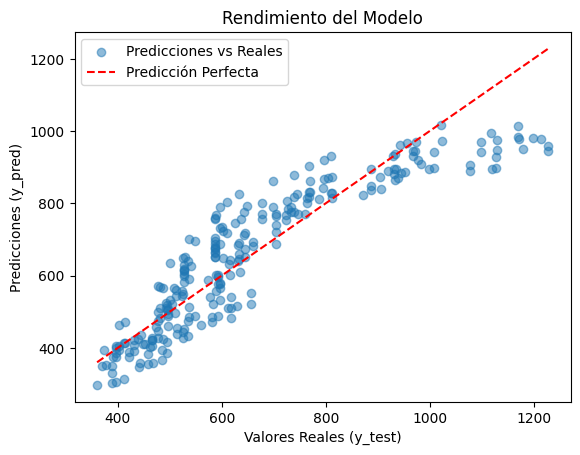

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicciones vs Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Predicción Perfecta')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.legend()
plt.title('Rendimiento del Modelo')
plt.show()

In [ ]:
pip install gradio


In [ ]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Cargar y preparar datos ---
df = df.rename(columns={'Todo Consumo': 'Tarifa_kWh'})

# Codificar clase de servicio
df['numero_clase_servicio'] = df['Clase de Servicio'].astype('category').cat.codes

# Guardar mapeo clase <-> número
mapa_servicio = dict(enumerate(df['Clase de Servicio'].astype('category').cat.categories))
# También al revés (nombre → número)
servicio_a_codigo = {v: k for k, v in mapa_servicio.items()}

# Variables predictoras y objetivo
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']

# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- Función de predicción ---
def predecir_tarifa(año, mes, clase_nombre):
    clase_codigo = servicio_a_codigo[clase_nombre]  # convertir nombre a número
    entrada = pd.DataFrame([[año, mes, clase_codigo]], columns=['Año', 'Numero_Mes', 'numero_clase_servicio'])
    prediccion = modelo.predict(entrada)[0]
    return f"Tarifa estimada: ${prediccion:.2f} por kWh"

# --- Crear interfaz con dropdown de clases ---
interfaz = gr.Interface(
    fn=predecir_tarifa,
    inputs=[
        gr.Slider(2014, 2030, step=1, label="Año"),
        gr.Slider(1, 12, step=1, label="Mes"),
        gr.Dropdown(choices=list(servicio_a_codigo.keys()), label="Clase de Servicio")
    ],
    outputs="text",
    title="Predicción de Tarifa Eléctrica en Colombia",
    description="Selecciona el año, mes y clase de servicio para predecir la tarifa regulada en $/kWh"
)

interfaz.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ff9619ce5907f94f83.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Produccion de energia de panels

In [ ]:
# cargar archivo exel en colab
#paso 1: Importar libreria
#from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Paso 3: Leer el archivo CSV usando pandas
import pandas as pd
df_paneles = pd.read_excel("/content/drive/MyDrive/bootcamp/ProductDatabaseSample.xlsx")
df_paneles.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ENF ID,Region,Series Name,Series Power Range (Wp),Model Name,Warranty Years,"Maximum Power, Pmax (W) At STC","Voltage at Maximum Power, Vmpp (V) At STC","Open Circuit Voltage, Voc (V) At STC","Short Circuit Current, Isc (A) At STC",...,Maximum System Voltage (V),Height (mm),Width (mm),Depth (mm),Weight (kg),Type,Technology,Company Contact Details,Series ID,Tipo_panel
0,329,Singapore,REC Alpha Pro M 600-640W,600 ~ 640,REC600AA Pro M,25.0,600,36.00,44.20,17.65,...,1500.0,2175,1305,30,32.5,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,65006,Panel comun
1,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC590AA Pro MG,30.0,590,35.80,44.10,17.34,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
2,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC600AA Pro MG,30.0,600,36.00,44.20,17.45,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
3,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC610AA Pro MG,30.0,610,36.30,44.40,17.56,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
4,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC620AA Pro MG,30.0,620,36.60,44.60,17.67,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
5,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC630AA Pro MG,30.0,630,36.80,44.70,17.78,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
6,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC640AA Pro MG,30.0,640,37.10,44.90,17.89,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
7,2236,China,DeepBlue 4.0 Pro JAM60D42-520-545/LB,520 ~ 545,JAM60D42-520/LB,12.0,520,36.37,43.53,15.16,...,1500.0,2063,1134,30,28.8,Monocrystalline,"Bifacial,N-type",https://www.enfsolar.com/ja-solar,67025,Panel comun
8,2236,China,DeepBlue 4.0 Pro JAM60D42-520-545/LB,520 ~ 545,JAM60D42-525/LB,12.0,525,36.59,43.73,15.21,...,1500.0,2063,1134,30,28.8,Monocrystalline,"Bifacial,N-type",https://www.enfsolar.com/ja-solar,67025,Panel comun
9,2236,China,DeepBlue 4.0 Pro JAM60D42-520-545/LB,520 ~ 545,JAM60D42-530/LB,12.0,530,36.81,43.93,15.26,...,1500.0,2063,1134,30,28.8,Monocrystalline,"Bifacial,N-type",https://www.enfsolar.com/ja-solar,67025,Panel comun


In [ ]:
# Renombrar columnas para consistencia
df_paneles.columns = df_paneles.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(',', '').str.replace('(', '').str.replace(')', '')

In [ ]:
# Identificar columnas con valores faltantes
missing_values = df_paneles.isnull().sum()
missing_values
print(df_paneles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   enf_id                                  104 non-null    int64  
 1   region                                  104 non-null    object 
 2   series_name                             104 non-null    object 
 3   series_power_range_wp                   104 non-null    object 
 4   model_name                              104 non-null    object 
 5   warranty_years                          98 non-null     float64
 6   maximum_power_pmax_w_at_stc             104 non-null    int64  
 7   voltage_at_maximum_power_vmpp_v_at_stc  104 non-null    float64
 8   open_circuit_voltage_voc_v_at_stc       104 non-null    float64
 9   short_circuit_current_isc_a_at_stc      104 non-null    float64
 10  panel_efficiency_%_at_stc               101 non-null    float6

In [ ]:
# Extraer valores numéricos de columnas como "series_power_range_wp"
df_paneles['power_min'] = df_paneles['series_power_range_wp'].str.extract(r'(\d+) ~ \d+').astype(float)
df_paneles['power_max'] = df_paneles['series_power_range_wp'].str.extract(r'\d+ ~ (\d+)').astype(float)

# Limpiar columnas con unidades mezcladas
df_paneles['maximum_power_pmax_w_at_stc'] = df_paneles['maximum_power_pmax_w_at_stc'].astype(float)

In [ ]:
# Eliminar registros duplicados exactos
df_paneles = df_paneles.drop_duplicates()

In [ ]:
df_paneles

,enf_id,region,series_name,series_power_range_wp,model_name,warranty_years,maximum_power_pmax_w_at_stc,voltage_at_maximum_power_vmpp_v_at_stc,open_circuit_voltage_voc_v_at_stc,short_circuit_current_isc_a_at_stc,...,width_mm,depth_mm,weight_kg,type,technology,company_contact_details,series_id,tipo_panel,power_min,power_max
0,329,Singapore,REC Alpha Pro M 600-640W,600 ~ 640,REC600AA Pro M,25.0,600.0,36.00,44.20,17.65,...,1305,30,32.5,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,65006,Panel comun,600.0,640.0
1,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC590AA Pro MG,30.0,590.0,35.80,44.10,17.34,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
2,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC600AA Pro MG,30.0,600.0,36.00,44.20,17.45,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
3,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC610AA Pro MG,30.0,610.0,36.30,44.40,17.56,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
4,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC620AA Pro MG,30.0,620.0,36.60,44.60,17.67,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,24065,Netherlands,MHI Series,370 ~ 380,S1.MHI365,12.0,365.0,33.86,40.38,11.26,...,1038,35,20.0,NaN,PERC,https://www.enfsolar.com/autarco,46343,Panel comun,370.0,380.0
100,2500,Spain,Onyx Solar Glass-Glass,100 ~ 150,OS-GG-130W,10.0,130.0,28.50,34.20,4.80,...,1000,6,18.0,Thin Film (CIGS),"Bifacial, Semi-Transparent",https://www.onyxsolar.com,Nuevo,tipo ventana,100.0,150.0
101,25001,Spain,Onyx Solar PVB Laminated,80 ~ 120,OS-PVB-100W,10.0,100.0,26.80,32.50,3.90,...,800,8,15.0,Thin Film (CIGS),Building-Integrated (BIPV),https://www.onyxsolar.com,Nuevo,tipo ventana,80.0,120.0
102,25002,USA,UE Power™ ClearView,50 ~ 100,UE-CV-80W,15.0,80.0,24.00,30.50,3.50,...,900,6,12.0,Thin Film (OPV),"Transparent, BIPV",https://ubiquitous.energy,Nuevo,tipo ventana,50.0,100.0


In [ ]:
#paneles_Fotovoltaicos_potentes

# Filtrar solo los paneles tipo "común"
paneles_comunes = df_paneles[df_paneles['tipo_panel'] == 'Panel comun']

# Ordenar por potencia máxima descendente y seleccionar los 4 primeros
top_4_paneles = paneles_comunes.sort_values(by='power_max', ascending=False).head(4)

# Seleccionar columnas relevantes para mostrar
columnas_relevantes = [
    'model_name',
    'series_name',
    'maximum_power_pmax_w_at_stc',
    'panel_efficiency_%_at_stc',
    'type',
    'technology',
    'company_contact_details'
]

paneles_Fotovoltaicos_potentes = top_4_paneles[columnas_relevantes]
paneles_Fotovoltaicos_potentes


,model_name,series_name,maximum_power_pmax_w_at_stc,panel_efficiency_%_at_stc,type,technology,company_contact_details
42,GDT132A-705,GDT132A-680-720W,705.0,22.70,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy
41,GDT132A-700,GDT132A-680-720W,700.0,22.53,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy
43,GDT132A-710,GDT132A-680-720W,710.0,22.86,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy
40,GDT132A-695,GDT132A-680-720W,695.0,22.37,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy


In [ ]:
#paneles_tipo_ventana_potentes
paneles_comunes = df_paneles[df_paneles['tipo_panel'] == 'tipo ventana']

# Ordenar por potencia máxima descendente y seleccionar los 4 primeros
top_4_paneles = paneles_comunes.sort_values(by='power_max', ascending=False).head(4)

# Seleccionar columnas relevantes para mostrar
columnas_relevantes = [
    'model_name',
    'series_name',
    'maximum_power_pmax_w_at_stc',
    'panel_efficiency_%_at_stc',
    'type',
    'technology',
    'company_contact_details'
]

paneles_tipo_ventana_potentes = top_4_paneles[columnas_relevantes]
paneles_tipo_ventana_potentes


,model_name,series_name,maximum_power_pmax_w_at_stc,panel_efficiency_%_at_stc,type,technology,company_contact_details
100,OS-GG-130W,Onyx Solar Glass-Glass,130.0,12.5,Thin Film (CIGS),"Bifacial, Semi-Transparent",https://www.onyxsolar.com
101,OS-PVB-100W,Onyx Solar PVB Laminated,100.0,10.8,Thin Film (CIGS),Building-Integrated (BIPV),https://www.onyxsolar.com
102,UE-CV-80W,UE Power™ ClearView,80.0,8.5,Thin Film (OPV),"Transparent, BIPV",https://ubiquitous.energy
103,UE-W-50W,UE Power™ Window,50.0,6.0,Thin Film (OPV),Ultra-Transparent,https://ubiquitous.energy


In [ ]:
import pandas as pd

# Definición de regiones y HSP (Horas Sol Pico)
regiones_colombia = {
    'Caribe': 5.5,
    'Andina': 5.0,
    'Pacífica': 4.1,
    'Orinoquía': 5.0,
    'Amazonía': 4.3
}

# Datos de los paneles (extraídos de los dataframes ya creados)
paneles = []

# Agregar paneles tipo ventana
for index, row in paneles_tipo_ventana_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],


        'category': 'ventana'
    })

# Agregar paneles tradicionales
for index, row in paneles_Fotovoltaicos_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'tradicional'
    })


# Función de cálculo
def calcular_produccion(pmax, hsp, perdidas=0.20):
    diario = (pmax/1000) * hsp * (1-perdidas)
    anual = diario * 365
    mensual = anual / 12  # Cálculo de producción mensual
    return round(diario, 2), round(anual, 2), round(mensual, 2)

# Generar resultados
resultados = []
for panel in paneles:
    for region, hsp in regiones_colombia.items():
        diario, anual, mensual = calcular_produccion(panel['pmax'], hsp)
        resultados.append({
            'Modelo': panel['model_name'],
            'Tipo': panel['type'],
            'Categoría': panel['category'],
            'Región': region,
            'Potencia (W)': panel['pmax'],
            'Producción diaria (kWh)': diario,
            'Producción mensual (kWh)': mensual,  # Nueva columna
            'Producción anual (kWh)': anual
        })
# Crear DataFrame
df_resultados = pd.DataFrame(resultados)
zona_andina = df_resultados[df_resultados['Región'] == 'Andina']
zona_andina

,Modelo,Tipo,Categoría,Región,Potencia (W),Producción diaria (kWh),Producción mensual (kWh),Producción anual (kWh)
1,OS-GG-130W,Thin Film (CIGS),ventana,Andina,130.0,0.52,15.82,189.8
6,OS-PVB-100W,Thin Film (CIGS),ventana,Andina,100.0,0.40,12.17,146.0
11,UE-CV-80W,Thin Film (OPV),ventana,Andina,80.0,0.32,9.73,116.8
16,UE-W-50W,Thin Film (OPV),ventana,Andina,50.0,0.20,6.08,73.0
21,GDT132A-705,Monocrystalline,tradicional,Andina,705.0,2.82,85.78,1029.3
26,GDT132A-700,Monocrystalline,tradicional,Andina,700.0,2.80,85.17,1022.0
31,GDT132A-710,Monocrystalline,tradicional,Andina,710.0,2.84,86.38,1036.6
36,GDT132A-695,Monocrystalline,tradicional,Andina,695.0,2.78,84.56,1014.7


In [ ]:
#contar tipo panles
df_paneles['type'].value_counts()

,count
type,
Monocrystalline,77
Polycrystalline,20
Thin Film (CIGS),2
Thin Film (OPV),2


In [ ]:
#contar tecnologias de los paneles
df_paneles['technology'].value_counts()

,count
technology,
"Bifacial,HJT",19
PERC,12
"Bifacial,N-type,TOPCon",11
"Bifacial,PERC",8
"N-type,TOPCon",7
"Bifacial,N-type",6
"Back Contact,Bifacial",5
"Bifacial, Semi-Transparent",1
Building-Integrated (BIPV),1


Medidas de Tendencia Central

In [ ]:
#Promedio de la potencia máxima de los paneles.
df_paneles['maximum_power_pmax_w_at_stc'].mean()

np.float64(431.2019230769231)

In [ ]:
#Mediana de la potencia máxima.
df_paneles['maximum_power_pmax_w_at_stc'].median()

477.5

In [ ]:
#Moda de la potencia máxima
df_paneles['maximum_power_pmax_w_at_stc'].mode()[0]

np.float64(240.0)

In [ ]:
#Promedio de la eficiencia de los paneles
df_paneles['panel_efficiency_%_at_stc'].mean()

np.float64(19.674158415841582)

Medidas de variabilidad

In [ ]:
# Medidas de variabilidad para 'maximum_power_pmax_w_at_stc' en df_paneles

# Varianza
varianza_power_pmax = df_paneles['maximum_power_pmax_w_at_stc'].var()
print(f"Varianza: {varianza_power_pmax:.2f}")

# Desviación Estándar
desviacion_estandar_power_pmax = df_paneles['maximum_power_pmax_w_at_stc'].std()
print(f"Desviación Estándar: {desviacion_estandar_power_pmax:.2f}")

# Rango
rango_power_pmax = df_paneles['maximum_power_pmax_w_at_stc'].max() - df_paneles['maximum_power_pmax_w_at_stc'].min()
print(f"Rango: {rango_power_pmax:.2f}")

# Cuartil 1 (Q1)
q1_power_pmax = df_paneles['maximum_power_pmax_w_at_stc'].quantile(0.25)
print(f"Cuartil 1 (Q1): {q1_power_pmax:.2f}")

# Cuartil 3 (Q3)
q3_power_pmax = df_paneles['maximum_power_pmax_w_at_stc'].quantile(0.75)
print(f"Cuartil 3 (Q3): {q3_power_pmax:.2f}")

# Rango Intercuartílico (IQR)
iqr_power_pmax = q3_power_pmax - q1_power_pmax
print(f"Rango Intercuartílico (IQR): {iqr_power_pmax:.2f}")

Varianza: 29576.45
Desviación Estándar: 171.98
Rango: 660.00
Cuartil 1 (Q1): 265.00
Cuartil 3 (Q3): 551.25
Rango Intercuartílico (IQR): 286.25


visualizaciones 📊

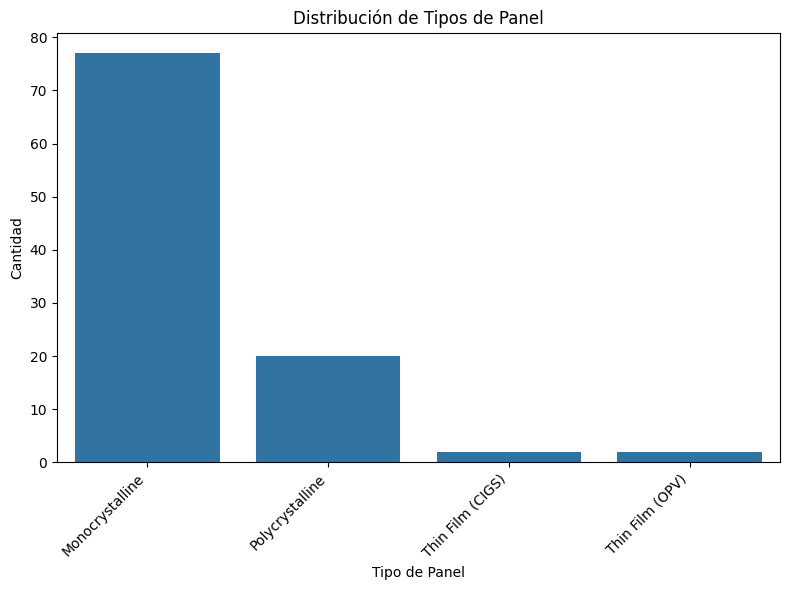

In [ ]:
#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de Tipos de Panel
plt.figure(figsize=(8, 6))
sns.countplot(data=df_paneles, x='type')
plt.title('Distribución de Tipos de Panel')
plt.xlabel('Tipo de Panel')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


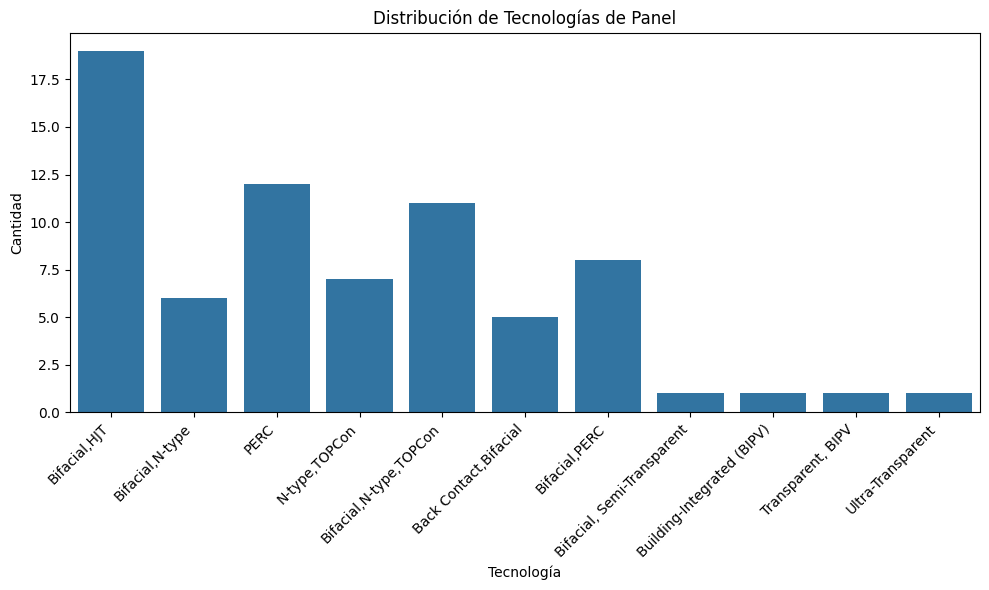

In [ ]:
# 2. Distribución de Tecnologías de Panel
plt.figure(figsize=(10, 6))
sns.countplot(data=df_paneles, x='technology')
plt.title('Distribución de Tecnologías de Panel')
plt.xlabel('Tecnología')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


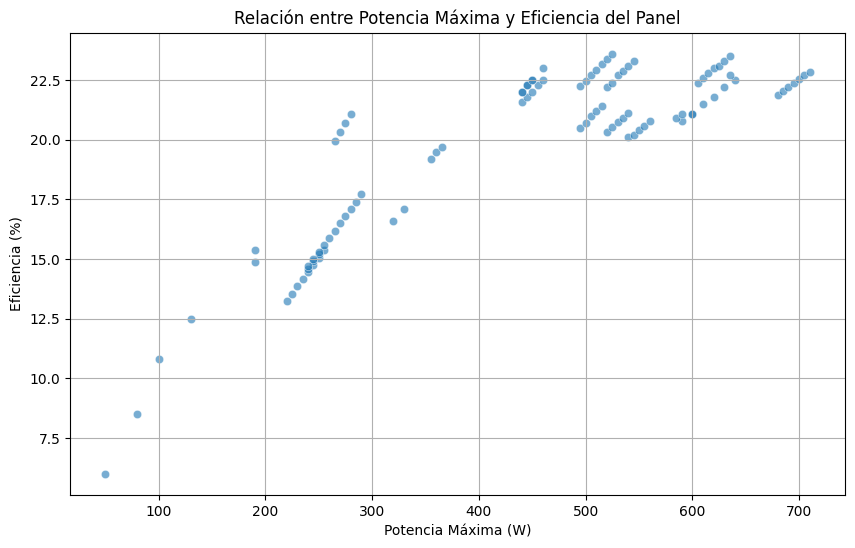

In [ ]:
# 3. Relación entre Potencia Máxima y Eficiencia del Panel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_paneles, x='maximum_power_pmax_w_at_stc', y='panel_efficiency_%_at_stc', alpha=0.6)
plt.title('Relación entre Potencia Máxima y Eficiencia del Panel')
plt.xlabel('Potencia Máxima (W)')
plt.ylabel('Eficiencia (%)')
plt.grid(True)
plt.show()


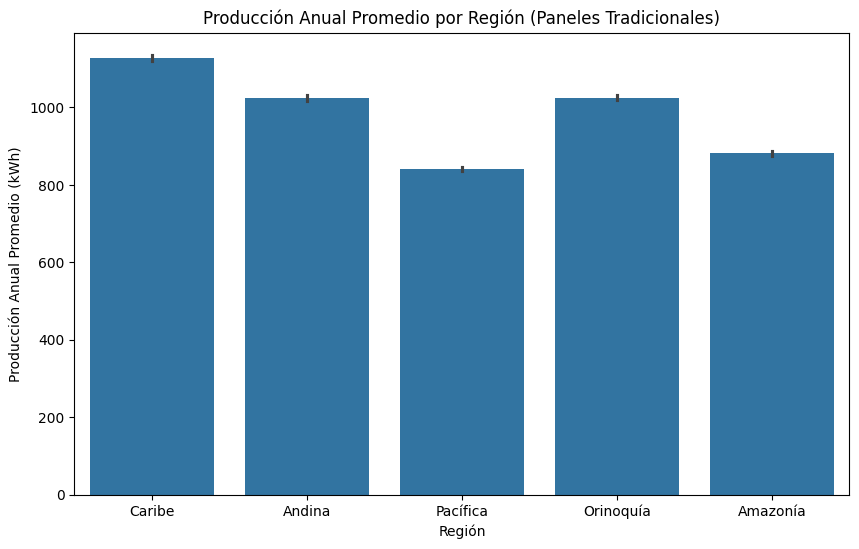

In [ ]:

# 4. Producción Anual Promedio por Región para Paneles Tradicionales
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados[df_resultados['Categoría'] == 'tradicional'], x='Región', y='Producción anual (kWh)')
plt.title('Producción Anual Promedio por Región (Paneles Tradicionales)')
plt.xlabel('Región')
plt.ylabel('Producción Anual Promedio (kWh)')
plt.show()

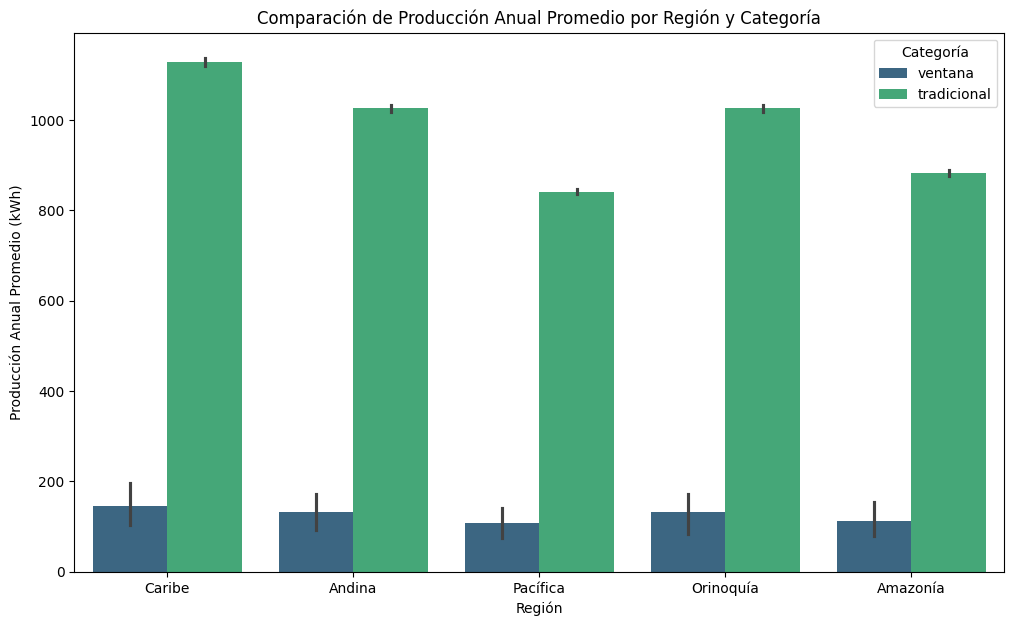

In [ ]:
# 5. Comparación de Producción Anual Promedio entre Categorías de Panel por Región
plt.figure(figsize=(12, 7))
sns.barplot(data=df_resultados, x='Región', y='Producción anual (kWh)', hue='Categoría', palette='viridis')
plt.title('Comparación de Producción Anual Promedio por Región y Categoría')
plt.xlabel('Región')
plt.ylabel('Producción Anual Promedio (kWh)')
plt.legend(title='Categoría')
plt.show()

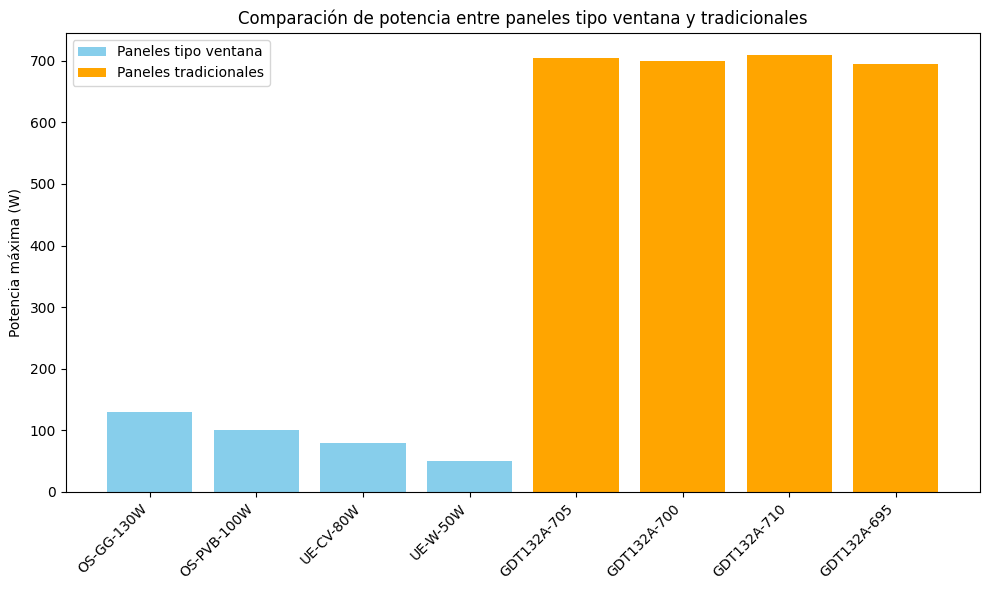

In [ ]:
# Separar los datos por categoría
nombres_ventana = [p['model_name'] for p in paneles if p['category'] == 'ventana']
pmax_ventana = [p['pmax'] for p in paneles if p['category'] == 'ventana']

nombres_tradicional = [p['model_name'] for p in paneles if p['category'] == 'tradicional']
pmax_tradicional = [p['pmax'] for p in paneles if p['category'] == 'tradicional']

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar barras
ax.bar(nombres_ventana, pmax_ventana, color='skyblue', label='Paneles tipo ventana')
ax.bar(nombres_tradicional, pmax_tradicional, color='orange', label='Paneles tradicionales')

# Configuración de ejes y título
ax.set_ylabel('Potencia máxima (W)')
ax.set_title('Comparación de potencia entre paneles tipo ventana y tradicionales')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Correlación entre Potencia Máxima y Eficiencia: 0.87


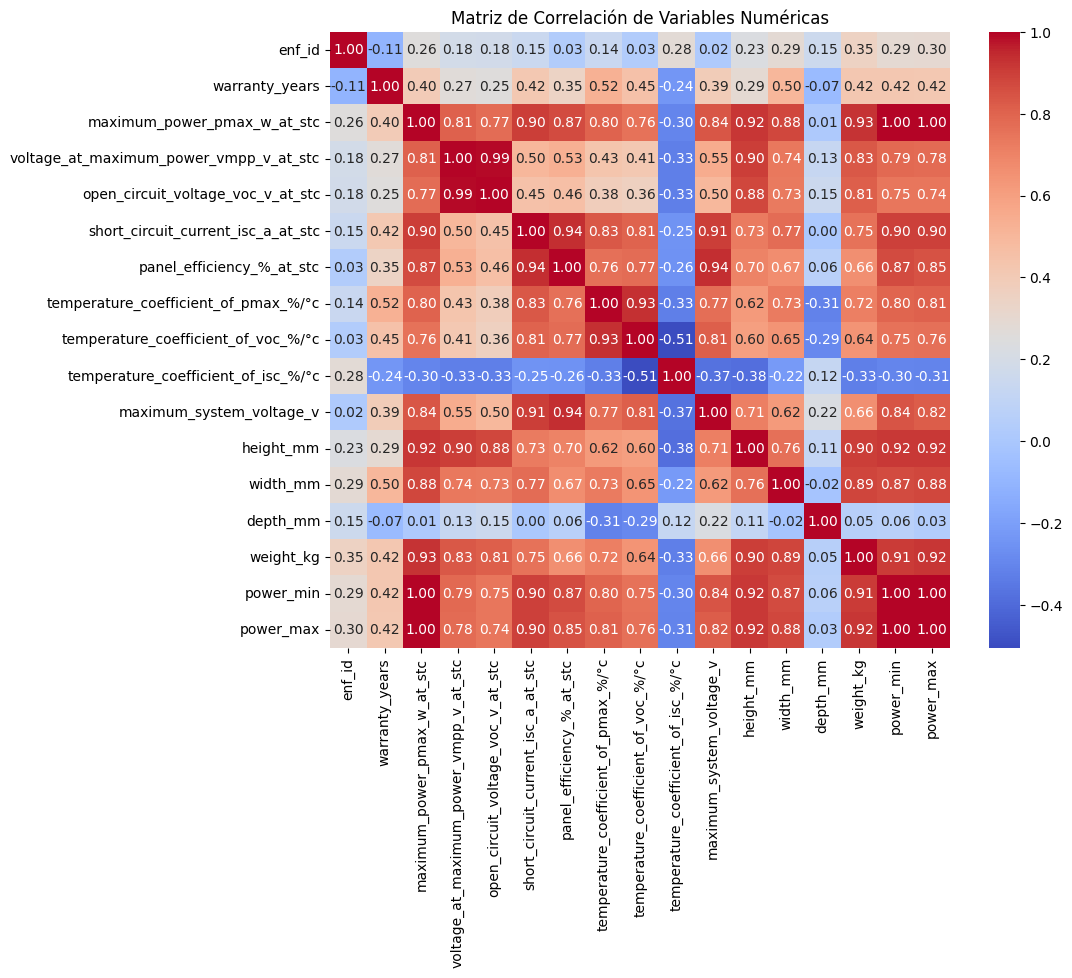

In [ ]:
# Correlación entre Potencia Máxima y Eficiencia
correlation = df_paneles['maximum_power_pmax_w_at_stc'].corr(df_paneles['panel_efficiency_%_at_stc'])
print(f"Correlación entre Potencia Máxima y Eficiencia: {correlation:.2f}")


# Matriz de Correlación (para columnas numéricas si hay más)
# Seleccionar solo columnas numéricas para la matriz de correlación
df_numeric = df_paneles.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#Correlaciones - positivas
#power_max y power_min: 1.00 → Totalmente correlacionadas.
#weight_kg con power_min (0.93), power_max (0.92): paneles más potentes son más pesados.
#height_mm y maximum_system_voltage_v: 0.94 → paneles más altos tienden a soportar más voltaje.


#Programa con Gradio

In [ ]:
# --- LIBRERÍAS ---
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Entrenar modelo de regresión
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']
modelo_tarifas = LinearRegression()
modelo_tarifas.fit(X, y)  # Usamos todos los datos para entrenar

# --- DATOS DE PANELES SOLARES ---
regiones_colombia = {
    'Caribe': 5.5,
    'Andina': 5.0,
    'Pacífica': 4.1,
    'Orinoquía': 5.0,
    'Amazonía': 4.3
}

# Datos de los paneles (extraídos de los dataframes ya creados)
paneles = []

# Agregar paneles tipo ventana
for index, row in paneles_tipo_ventana_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'ventana'
    })

# Agregar paneles tradicionales
for index, row in paneles_Fotovoltaicos_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'tradicional'
    })


def calcular_produccion(pmax, hsp, perdidas=0.20):
    diario = (pmax/1000) * hsp * (1 - perdidas)
    mensual = diario * 30
    return mensual  # Retornamos producción mensual (kWh)

# --- FUNCIÓN PRINCIPAL INTEGRADA ---
def simular_ahorro(consumo_mes, año, mes, clase_servicio, region, modelo_panel, num_paneles):
    # 1. Predecir tarifa
    clase_codigo = servicio_a_codigo[clase_servicio]
    tarifa_pred = modelo_tarifas.predict([[año, mes, clase_codigo]])[0]

    # 2. Calcular producción solar
    panel = next(p for p in paneles if p['model_name'] == modelo_panel)
    hsp = regiones_colombia[region]
    produccion_mes = calcular_produccion(panel['pmax'], hsp) * num_paneles

    # 3. Comparar consumo vs producción
    ahorro = min(produccion_mes, consumo_mes) * tarifa_pred
    costo_sin_paneles = consumo_mes * tarifa_pred
    costo_con_paneles = max(0, consumo_mes - produccion_mes) * tarifa_pred

    # 4. Generar resultados
    return {
        "Producción solar (kWh/mes)": f"{produccion_mes:.2f}",
        "Tarifa estimada ($/kWh)": f"${tarifa_pred:.2f}",
        "Costo mensual sin paneles": f"${costo_sin_paneles:.2f}",
        "Costo mensual con paneles": f"${costo_con_paneles:.2f}",
        "Ahorro potencial": f"${ahorro:.2f}",
    }

# --- INTERFAZ GRADIO ---
opciones_paneles = [
    (f"{p['model_name']} ({p['category']})", p['model_name']) for p in paneles
]
opciones_clases = list(servicio_a_codigo.keys())

with gr.Blocks() as app:
    gr.Markdown("## 🌞 Simulador de Ahorro con Paneles Solares en Colombia")
    with gr.Row():
        consumo = gr.Number(label="Consumo mensual (kWh)", value=300)
        año = gr.Slider(2024, 2030, step=1, label="Año de predicción")
        mes = gr.Slider(1, 12, step=1, label="Mes")
    with gr.Row():
        clase = gr.Dropdown(opciones_clases, label="Clase de servicio")
        region = gr.Dropdown(list(regiones_colombia.keys()), label="Región")
    with gr.Row():
        modelo = gr.Dropdown(opciones_paneles, label="Modelo de panel")
        num_paneles = gr.Number(label="Número de paneles", value=1)

    boton = gr.Button("Calcular ahorro")
    resultados = gr.JSON(label="Resultados")

    boton.click(
        simular_ahorro,
        inputs=[consumo, año, mes, clase, region, modelo, num_paneles],
        outputs=resultados
    )

app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://32961f89abd3055bb8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Pagina 🦖

In [ ]:
from IPython.display import HTML, display
import json
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Entrenar el modelo de regresión (asegúrate de que df está cargado)
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']
# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 2. Preparar datos para la interfaz
regiones_colombia = {
    'Caribe': 5.5,
    'Andina': 5.0,
    'Pacífica': 4.1,
    'Orinoquía': 5.0,
    'Amazonía': 4.3
}

# Preparar datos de paneles (ajusta según tus DataFrames)
paneles_data = []

# Agregar paneles tipo ventana
for index, row in paneles_tipo_ventana_potentes.iterrows():
    paneles_data.append({
        'model_name': row['model_name'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'ventana'
    })

# Agregar paneles tradicionales
for index, row in paneles_Fotovoltaicos_potentes.iterrows():
    paneles_data.append({
        'model_name': row['model_name'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'tradicional'
    })

# Mapeo de clases de servicio a códigos numéricos
servicio_a_codigo = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Comercial/Industrial': 7,
    'Oficial/Especial': 8
}

clases_servicio = list(servicio_a_codigo.keys())

# 3. Generar el HTML/JS con los coeficientes del modelo
html_code = f"""
<!DOCTYPE html>
<html lang="es">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Simulador de Energía Solar Colombia</title>
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <style>
        * {{
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }}

        body {{
            font-family: 'Arial', sans-serif;
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            min-height: 100vh;
            position: relative;
            overflow-x: hidden;
        }}

        .energy-particles {{
            position: fixed;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
            pointer-events: none;
            z-index: 1;
        }}

        .particle {{
            position: absolute;
            width: 4px;
            height: 4px;
            background: #ffd700;
            border-radius: 50%;
            animation: float 6s infinite ease-in-out;
            box-shadow: 0 0 10px #ffd700;
        }}

        @keyframes float {{
            0%, 100% {{ transform: translateY(0px) rotate(0deg); opacity: 0.3; }}
            50% {{ transform: translateY(-20px) rotate(180deg); opacity: 1; }}
        }}

        .container {{
            max-width: 1200px;
            margin: 0 auto;
            padding: 20px;
            position: relative;
            z-index: 2;
        }}

        .header {{
            text-align: center;
            margin-bottom: 40px;
            background: rgba(255, 255, 255, 0.1);
            backdrop-filter: blur(10px);
            border-radius: 20px;
            padding: 30px;
            border: 1px solid rgba(255, 255, 255, 0.2);
        }}

        .header h1 {{
            color: #fff;
            font-size: 2.5em;
            margin-bottom: 10px;
            text-shadow: 2px 2px 4px rgba(0,0,0,0.3);
        }}

        .header p {{
            color: #f0f0f0;
            font-size: 1.2em;
        }}

        .main-content {{
            display: grid;
            grid-template-columns: 1fr 1fr;
            gap: 30px;
            margin-bottom: 30px;
        }}

        .input-panel {{
            background: rgba(255, 255, 255, 0.95);
            border-radius: 20px;
            padding: 30px;
            box-shadow: 0 15px 35px rgba(0,0,0,0.1);
            backdrop-filter: blur(10px);
        }}

        .panel-title {{
            color: #333;
            font-size: 1.5em;
            margin-bottom: 25px;
            font-weight: bold;
            text-align: center;
        }}

        .input-group {{
            margin-bottom: 25px;
        }}

        .input-group label {{
            display: block;
            margin-bottom: 8px;
            font-weight: bold;
            color: #333;
            font-size: 1.1em;
        }}

        .input-group input, .input-group select {{
            width: 100%;
            padding: 12px 15px;
            border: 2px solid #e0e0e0;
            border-radius: 12px;
            font-size: 1em;
            transition: all 0.3s ease;
            background: rgba(0, 0, 0, 0.05);
            color: #333;
            font-weight: 500;
        }}

        .input-group input:focus, .input-group select:focus {{
            outline: none;
            border-color: #667eea;
            box-shadow: 0 0 15px rgba(102, 126, 234, 0.3);
            transform: translateY(-2px);
            background: rgba(0, 0, 0, 0.03);
        }}

        .calculate-btn {{
            width: 100%;
            padding: 15px;
            background: linear-gradient(135deg, #ffd700 0%, #ff8c00 100%);
            border: none;
            border-radius: 15px;
            color: white;
            font-size: 1.2em;
            font-weight: bold;
            cursor: pointer;
            transition: all 0.3s ease;
            box-shadow: 0 10px 25px rgba(255, 140, 0, 0.3);
        }}

        .calculate-btn:hover {{
            transform: translateY(-3px);
            box-shadow: 0 15px 35px rgba(255, 140, 0, 0.4);
        }}

        .results-panel {{
            background: rgba(255, 255, 255, 0.95);
            border-radius: 20px;
            padding: 30px;
            box-shadow: 0 15px 35px rgba(0,0,0,0.1);
            backdrop-filter: blur(10px);
        }}

        .results-title {{
            text-align: center;
            font-size: 1.5em;
            color: #333;
            margin-bottom: 25px;
            font-weight: bold;
        }}

        .metric-card {{
            background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
            color: white;
            padding: 20px;
            border-radius: 15px;
            margin-bottom: 15px;
            transition: all 0.3s ease;
        }}

        .metric-card:hover {{
            transform: translateY(-5px);
            box-shadow: 0 10px 25px rgba(0,0,0,0.2);
        }}

        .metric-label {{
            font-size: 0.9em;
            opacity: 0.9;
            margin-bottom: 5px;
        }}

        .metric-value {{
            font-size: 1.4em;
            font-weight: bold;
        }}

        .solar-meter {{
            position: relative;
            width: 200px;
            height: 200px;
            margin: 20px auto;
            background: conic-gradient(from 0deg, #ff6b6b 0%, #ffd700 50%, #4ecdc4 100%);
            border-radius: 50%;
            display: flex;
            align-items: center;
            justify-content: center;
        }}

        .solar-meter::before {{
            content: '';
            position: absolute;
            width: 160px;
            height: 160px;
            background: white;
            border-radius: 50%;
        }}

        .meter-content {{
            position: relative;
            z-index: 1;
            text-align: center;
        }}

        .meter-value {{
            font-size: 2em;
            font-weight: bold;
            color: #333;
        }}

        .meter-label {{
            font-size: 0.9em;
            color: #666;
        }}

        .comparison-section {{
            background: rgba(255, 255, 255, 0.9);
            border-radius: 15px;
            padding: 20px;
            margin: 25px 0;
            box-shadow: 0 10px 30px rgba(0,0,0,0.1);
        }}

        .comparison-title {{
            text-align: center;
            font-size: 1.3em;
            color: #333;
            margin-bottom: 20px;
            font-weight: bold;
            position: relative;
            padding-bottom: 10px;
        }}

        .comparison-title:after {{
            content: '';
            position: absolute;
            bottom: 0;
            left: 25%;
            width: 50%;
            height: 3px;
            background: linear-gradient(to right, #ff6b6b, #ffd700, #4ecdc4);
            border-radius: 3px;
        }}

        .comparison-cards {{
            display: flex;
            justify-content: space-between;
            gap: 20px;
        }}

        .comparison-card {{
            flex: 1;
            background: white;
            border-radius: 12px;
            padding: 20px;
            text-align: center;
            box-shadow: 0 5px 15px rgba(0,0,0,0.08);
            transition: all 0.3s ease;
            position: relative;
            overflow: hidden;
        }}

        .comparison-card:hover {{
            transform: translateY(-5px);
            box-shadow: 0 10px 25px rgba(0,0,0,0.15);
        }}

        .comparison-card.sin {{
            border-top: 4px solid #ff6b6b;
        }}

        .comparison-card.con {{
            border-top: 4px solid #4ecdc4;
        }}

        .comparison-card:before {{
            content: '';
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 5px;
            background: linear-gradient(to right, #ff6b6b, #4ecdc4);
            opacity: 0.2;
        }}

        .comparison-label {{
            font-size: 1.1em;
            color: #555;
            margin-bottom: 15px;
            font-weight: 600;
        }}

        .comparison-value {{
            font-size: 1.8em;
            font-weight: bold;
            margin: 15px 0;
        }}

        .comparison-value.sin {{
            color: #ff6b6b;
        }}

        .comparison-value.con {{
            color: #4ecdc4;
        }}

        .comparison-difference {{
            font-size: 1.1em;
            color: #666;
            margin-top: 10px;
        }}

        .savings-badge {{
            display: inline-block;
            background: linear-gradient(135deg, #4ecdc4 0%, #48b1bf 100%);
            color: white;
            padding: 5px 15px;
            border-radius: 20px;
            font-weight: bold;
            margin-top: 15px;
            font-size: 0.9em;
            box-shadow: 0 3px 10px rgba(0,0,0,0.1);
        }}

        .chart-container {{
            margin-top: 20px;
            background: rgba(255, 255, 255, 0.9);
            border-radius: 15px;
            padding: 20px;
            box-shadow: 0 5px 15px rgba(0,0,0,0.1);
        }}

        .chart-title {{
            text-align: center;
            font-size: 1.2em;
            color: #333;
            margin-bottom: 15px;
            font-weight: bold;
        }}

        .chart {{
            width: 100%;
            height: 200px;
            position: relative;
            display: flex;
            align-items: flex-end;
            justify-content: space-around;
            padding: 0 20px;
        }}

        .chart-bar {{
            width: 40%;
            display: flex;
            flex-direction: column;
            align-items: center;
        }}

        .bar {{
            width: 60px;
            background: #e0e0e0;
            border-radius: 5px 5px 0 0;
            position: relative;
            transition: height 1s ease;
        }}

        .bar-fill {{
            width: 100%;
            position: absolute;
            bottom: 0;
            left: 0;
            border-radius: 5px 5px 0 0;
        }}

        .bar-fill.sin {{
            background: linear-gradient(to top, #ff6b6b, #ff8c00);
        }}

        .bar-fill.con {{
            background: linear-gradient(to top, #4ecdc4, #48b1bf);
        }}

        .bar-label {{
            margin-top: 10px;
            font-weight: bold;
            color: #333;
        }}

        .bar-value {{
            position: absolute;
            top: -25px;
            width: 100%;
            text-align: center;
            font-weight: bold;
            color: #333;
        }}

        @media (max-width: 768px) {{
            .main-content {{
                grid-template-columns: 1fr;
            }}

            .header h1 {{
                font-size: 2em;
            }}

            .solar-meter {{
                width: 150px;
                height: 150px;
            }}

            .comparison-cards {{
                flex-direction: column;
            }}
        }}
    </style>
</head>
<body>
    <!-- Partículas de energía -->
    <div class="energy-particles" id="particles"></div>

    <div class="container">
        <div class="header">
            <h1>Simulador de Energía Solar Colombia</h1>
            <p>Calcule su ahorro potencial con paneles solares</p>
        </div>

        <div class="main-content">
            <div class="input-panel">
                <h2 class="panel-title">Parámetros de Simulación</h2>

                <div class="input-group">
                    <label for="consumo">Consumo mensual (kWh)</label>
                    <input type="number" id="consumo" placeholder="Ej: 300" min="1" value="300">
                </div>

                <div class="input-group">
                    <label for="anio">Año de predicción</label>
                    <input type="number" id="anio" min="2014" max="2030" value="2024" step="1">
                </div>

                <div class="input-group">
                    <label for="mes">Mes</label>
                    <select id="mes">
                        <option value="1">Enero</option>
                        <option value="2">Febrero</option>
                        <option value="3">Marzo</option>
                        <option value="4">Abril</option>
                        <option value="5">Mayo</option>
                        <option value="6" selected>Junio</option>
                        <option value="7">Julio</option>
                        <option value="8">Agosto</option>
                        <option value="9">Septiembre</option>
                        <option value="10">Octubre</option>
                        <option value="11">Noviembre</option>
                        <option value="12">Diciembre</option>
                    </select>
                </div>

                <div class="input-group">
                    <label for="clase">Clase de servicio</label>
                    <select id="clase">
                        {''.join([f'<option value="{clase}">{clase}</option>' for clase in clases_servicio])}
                    </select>
                </div>

                <div class="input-group">
                    <label for="region">Región</label>
                    <select id="region">
                        {''.join([f'<option value="{region}">{region}</option>' for region in regiones_colombia.keys()])}
                    </select>
                </div>

                <div class="input-group">
                    <label for="modelo">Modelo de Panel</label>
                    <select id="modelo">
                        {''.join([f'<option value="{p["model_name"]}" data-pmax="{p["pmax"]}">{p["model_name"]} - {p["category"]} ({p["pmax"]}W)</option>' for p in paneles_data])}
                    </select>
                </div>

                <div class="input-group">
                    <label for="paneles">Número de paneles</label>
                    <input type="number" id="paneles" min="1" value="1">
                </div>

                <button id="calcular" class="calculate-btn">
                    <i class="fas fa-bolt"></i> Calcular Ahorro
                </button>
            </div>

            <div class="results-panel">
                <h2 class="results-title">Resultados de la Simulación</h2>

                <div class="solar-meter">
                    <div class="meter-content">
                        <div class="meter-value" id="ahorro-porcentaje">0%</div>
                        <div class="meter-label">de ahorro</div>
                    </div>
                </div>

                <div class="metric-card">
                    <div class="metric-label">Producción Solar Estimada</div>
                    <div class="metric-value" id="produccion">0 kWh/mes</div>
                </div>

                <div class="metric-card">
                    <div class="metric-label">Tarifa Estimada</div>
                    <div class="metric-value" id="tarifa">$0 /kWh</div>
                </div>

                <div class="comparison-section">
                    <h3 class="comparison-title">Comparación de Costos</h3>
                    <div class="comparison-cards">
                        <div class="comparison-card sin">
                            <div class="comparison-label">Sin Paneles Solares</div>
                            <div class="comparison-value sin" id="price-sin">$0</div>
                            <div class="comparison-difference">Costo total mensual</div>
                        </div>

                        <div class="comparison-card con">
                            <div class="comparison-label">Con Paneles Solares</div>
                            <div class="comparison-value con" id="price-con">$0</div>
                            <div class="comparison-difference">Costo total mensual</div>
                            <div class="savings-badge" id="savings-badge">Ahorras $0</div>
                        </div>
                    </div>
                </div>



                <div class="metric-card" style="background: linear-gradient(135deg, #4ecdc4 0%, #48b1bf 100%);">
                    <div class="metric-label">Ahorro Potencial Mensual</div>
                    <div class="metric-value" id="ahorro">$0</div>
                </div>
            </div>
        </div>
    </div>

    <script>
        // Datos para los cálculos
        const regiones = {json.dumps(regiones_colombia)};
        const servicioCodigo = {json.dumps(servicio_a_codigo)};

        // Coeficientes del modelo de regresión (extraídos directamente de Python)
        const modeloCoeficientes = {{
            intercepto: {modelo.intercept_}, //Esta es la tarifa base cuando todos los demás factores son cero.
            año: {modelo.coef_[0]},
            mes: {modelo.coef_[1]},
            clase: {modelo.coef_[2]}
        }};

        // Función para predecir la tarifa usando el modelo de regresión
        function predecirTarifa(año, mes, clase) {{
            // Convertir clase de servicio a código numérico
            const codigoClase = servicioCodigo[clase] || 1;

            // Calcular tarifa según el modelo de regresión
            const tarifa = modeloCoeficientes.intercepto +
                         (modeloCoeficientes.año * año) +
                         (modeloCoeficientes.mes * mes) +
                         (modeloCoeficientes.clase * codigoClase);

            return Math.max(0, tarifa);  // Asegurar que no sea negativa
        }}

        // Función para calcular producción solar
        function calcularProduccion(pmax, region, numPaneles) {{
            const hsp = regiones[region];
            const perdidas = 0.20; // 20% de pérdidas
            const diario = (pmax / 1000) * hsp * (1 - perdidas);
            return diario * 30 * numPaneles; // Producción mensual
        }}

        // Función para formatear dinero
        function formatMoney(amount) {{
            return '$' + amount.toFixed(2).replace(/\\d(?=(\\d{{3}})+\\.)/g, '$&,');
        }}

        // Función principal de cálculo
        function calcularAhorro() {{
            try {{
                // Obtener valores del formulario
                const consumo = parseFloat(document.getElementById('consumo').value) || 0;
                const anio = parseInt(document.getElementById('anio').value) || 2023;
                const mes = parseInt(document.getElementById('mes').value) || 6;
                const clase = document.getElementById('clase').value;
                const region = document.getElementById('region').value;
                const modeloSelect = document.getElementById('modelo');
                const pmax = parseFloat(modeloSelect.options[modeloSelect.selectedIndex].dataset.pmax);
                const numPaneles = parseInt(document.getElementById('paneles').value) || 1;

                // Validar valores
                if(consumo <= 0 || numPaneles <= 0) {{
                    alert("Por favor ingrese valores válidos mayores a cero");
                    return;
                }}

                // Calcular producción solar
                const produccion = calcularProduccion(pmax, region, numPaneles);

                // Predecir tarifa usando el modelo de regresión
                const tarifa = predecirTarifa(anio, mes, clase);

                // Calcular resultados
                const ahorro = Math.min(produccion, consumo) * tarifa;
                const costoSinPaneles = consumo * tarifa;
                const costoConPaneles = Math.max(0, consumo - produccion) * tarifa;
                const porcentajeAhorro = costoSinPaneles > 0 ? (ahorro / costoSinPaneles) * 100 : 0;

                // Actualizar UI
                document.getElementById('produccion').textContent = produccion.toFixed(2) + ' kWh/mes';
                document.getElementById('tarifa').textContent = formatMoney(tarifa) + '/kWh';
                document.getElementById('ahorro').textContent = formatMoney(ahorro);
                document.getElementById('ahorro-porcentaje').textContent = porcentajeAhorro.toFixed(1) + '%';

                // Actualizar sección de comparación
                document.getElementById('price-sin').textContent = formatMoney(costoSinPaneles);
                document.getElementById('price-con').textContent = formatMoney(costoConPaneles);
                document.getElementById('savings-badge').textContent = `Ahorras ${{formatMoney(ahorro)}}`;



            }} catch (error) {{
                console.error("Error en el cálculo:", error);
                alert("Ocurrió un error en los cálculos. Por favor verifique los datos.");
            }}
        }}

        // Crear partículas de energía
        function crearParticulas() {{
            const container = document.getElementById('particles');
            for (let i = 0; i < 50; i++) {{
                const particle = document.createElement('div');
                particle.classList.add('particle');
                particle.style.left = Math.random() * 100 + '%';
                particle.style.top = Math.random() * 100 + '%';
                particle.style.animationDelay = Math.random() * 6 + 's';
                particle.style.opacity = Math.random();
                container.appendChild(particle);
            }}
        }}

        // Event listeners
        document.getElementById('calcular').addEventListener('click', calcularAhorro);

        // Inicialización
        document.addEventListener('DOMContentLoaded', () => {{
            crearParticulas();
            calcularAhorro();  // Calcular con valores por defecto al cargar
        }});
    </script>
</body>
</html>
"""

# Mostrar la interfaz
display(HTML(html_code))